<a href="https://colab.research.google.com/github/MinyoungHer/Pytorch-study/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pytorch workflow

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for nueral network
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

from typing import Text
##1. Data(preparing and loading)

Data can be almost anyting... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. GEt data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

In [ ]:
# Create *known* parameters
weight=0.7
bias=0.3

#Create
start=0
end=1
step=0.02
X=torch.arange(start,end, step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets(one of the most important concepts in machine learning in general)

Three datasets
- Training sets: Model learns patterns from here, 60~80%
- Validations set: Tune model patterns, 10~20%
- Test set: see if the model is ready for the wild, 10~20%

In [ ]:
# Create a train/test split

train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

Visualize

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')

  #plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  #Are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  #Show the legend
  plt.legend(prop={"size":14});



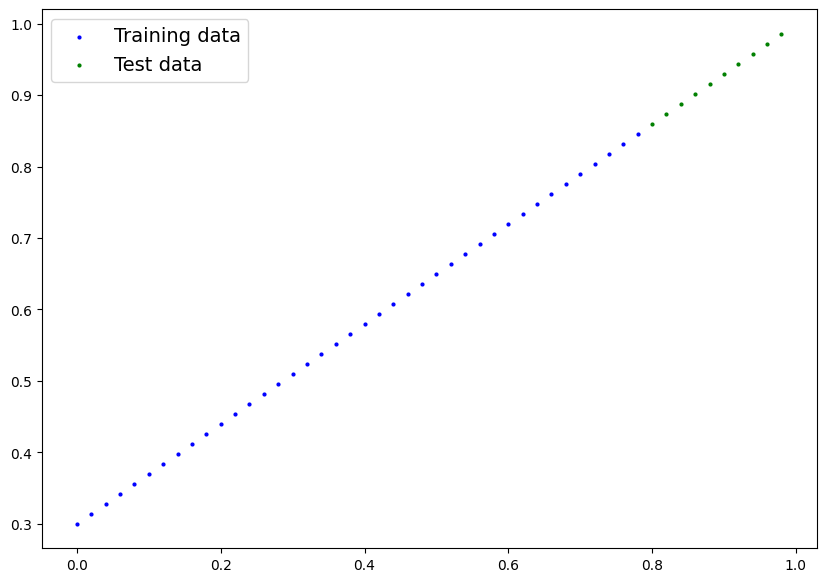

In [ ]:
plot_predictions();

## 2. Build model
First Pytorch model

what our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight&bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Back propagation

In [ ]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()

    #Initialize model parameters
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=float))

    #Forward method to define the computiation in the model
  def forward(self, x: torch.Tensor)-> torch.Tensor:
      return self.weights * x + self.bias # this is the linear regression formula

### Pythorch model building essentials

* torch.nn-contains all of the building for computational graphs( a nueral network van be considred a computational graph)
* torch.nn.Parameter- what parameters should our model try and learn, often a pytorch layer from torch.nn. will set these for us)
* torch.nn.Module- The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside...

so we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'Xtest'.

When we pass data through our model, it's going to run it through forward() method

In [ ]:
y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [ ]:
# make predictions with model
# turns off the gradient tracking
# faster calculation
with torch.inference_mode():
  y_preds=model_0(X_test)

# you can also do something similar with torch.no_grad(), however, infrerence_mode() is preferred
with torch.no_grad():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

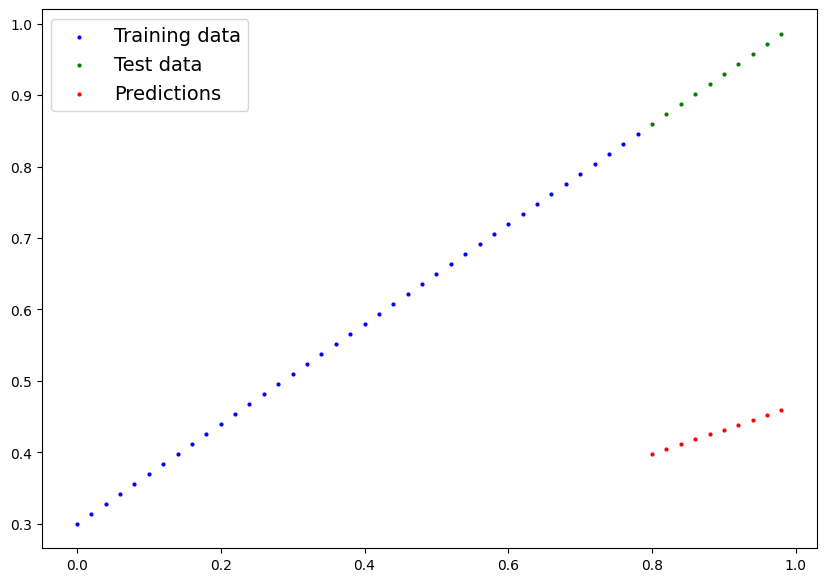

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to ove from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better one

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower the better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(eg. Weight&Bias in our case) to improve the loss function.

** inside the optimizer you'll often have to set two parameters
* params - the model parameters you'd like to optimize
* lr(learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the paramters with each step(a small lr results in small changes, a large lr results in large changes)

And specifically for Pytorch, we need:
* A training loop
* A testing loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [ ]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(model_0.parameters(),
                          lr=0.01) #Learning rate= possibly the most important hyperparameter you get


### Building a training loop(and a testing loop) in Pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground thruth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is on loop through the data...
epochs=200


#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require to require gradients

  #1. Forward pass
  y_pred=model_0(X_train)

  #2. Calculate the loss
  loss=loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so.. we have to zero them above in step 3


  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (drop out/ batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  #with torch.no_grad(): # you may also see torch.no_grad() in older Pytorch code
    #1.Do the forward pass
    test_pred=model_0(X_test)

    #2. Calculate the loss
    test_loss=loss_fn(test_pred, y_test)
  # print out what's happenin
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch}| Loss:{loss}| Test loss:{test_loss}")

    #print out model state_dict()
    print(model_0.state_dict())


Epoch:0| Loss:0.3128813517678373| Test loss:0.4810651795382455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch:10| Loss:0.19767138632506426| Test loss:0.346355255078788
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch:20| Loss:0.08908726094682914| Test loss:0.21729659528684148
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch:30| Loss:0.05314853437903411| Test loss:0.14464020247411263
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch:40| Loss:0.045437965798191725| Test loss:0.11360953504991064
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch:50| Loss:0.04167863324115598| Test loss:0.09919951553296583
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843], dtype=torch.float64))])
Epoch:60| Loss:0.03818932177440422| Test los

In [ ]:
import numpy as np
loss_values=np.array(torch.tensor(loss_values).cpu().numpy())
test_loss_values=np.array(torch.tensor(test_loss_values).cpu().numpy())

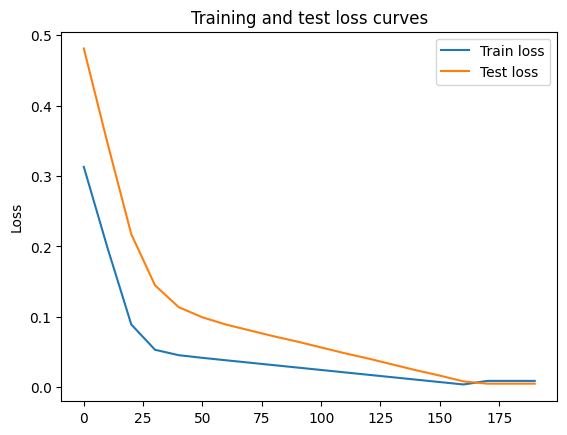

In [ ]:
#Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

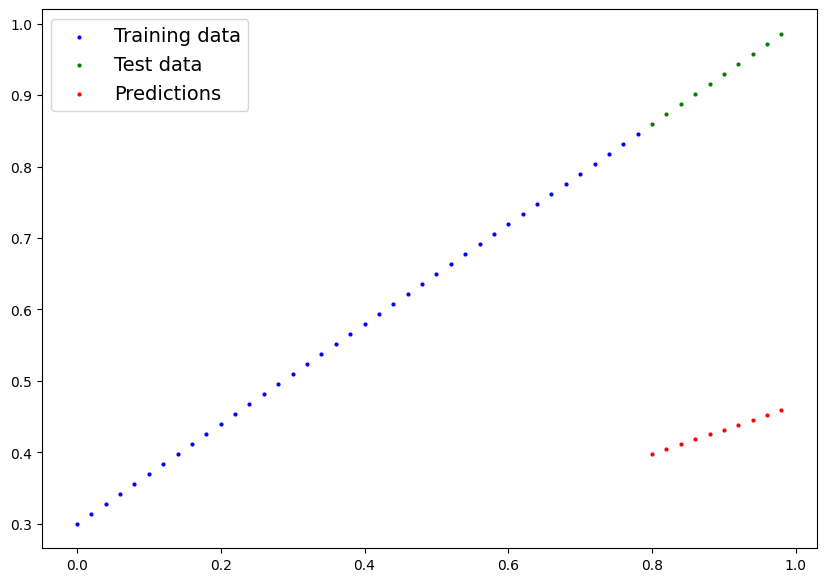

In [ ]:
plot_predictions(predictions=y_preds)

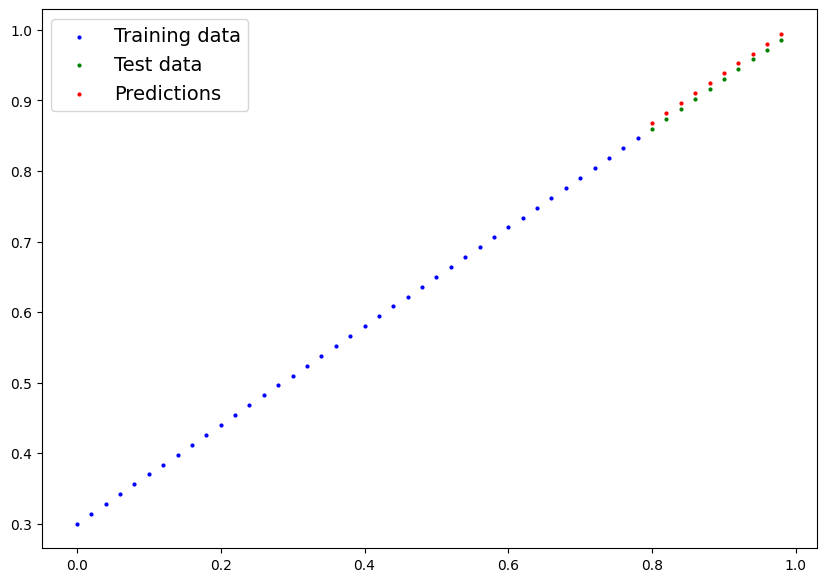

In [ ]:
plot_predictions(predictions=y_preds_new);

## Saving a model in Pytorch

There are three main methods you should know about for siaving and loading models in Pytorch

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you load a saved Pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0

LinearRegressionModel()

In [ ]:
!ls -1 models

01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our model's `state_dict()` rather the entire model , we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [ ]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [ ]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code
This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [ ]:
# setup device agnostic code
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

###6.1 Data

In [ ]:
# Create some data using the linear regression formula of y=weight*X+bias
weight=0.7
bias=0.3

# Create range values
start=0
end=1
step=0.02

#Create x and y (features and labels)
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

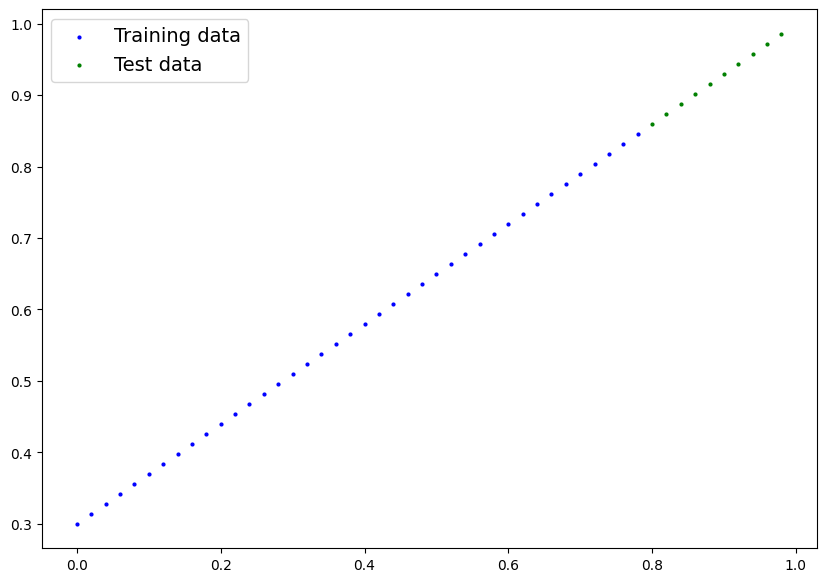

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a Pytorch Linear model

In [ ]:
#create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creaing the model parameters / also called: linear transform, probing layer, fully conndected layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn=nn.L1Loss()

# setup our optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [ ]:
#Let;s write a training loop
torch.manual_seed(42)

epochs=200

# Put data on the target device (device agnostic code for data)
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()

  #. Forward pass
  y_pred=model_1(X_train)

  #2. Calculate the loss
  loss=loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss=loss_fn(test_pred, y_test)

    #print out what's happening

    if epoch%10==0:
      print(f"Epoch : {epoch} | Loss: {loss} | Test: {test_loss}")

Epoch : 0 | Loss: 0.5436570048332214 | Test: 0.560505211353302
Epoch : 10 | Loss: 0.42844706773757935 | Test: 0.42579540610313416
Epoch : 20 | Loss: 0.31323719024658203 | Test: 0.2910855710506439
Epoch : 30 | Loss: 0.1980273425579071 | Test: 0.15637575089931488
Epoch : 40 | Loss: 0.0828174576163292 | Test: 0.021665919572114944
Epoch : 50 | Loss: 0.023356428369879723 | Test: 0.04883447289466858
Epoch : 60 | Loss: 0.019609849900007248 | Test: 0.04538799077272415
Epoch : 70 | Loss: 0.01618141122162342 | Test: 0.03711546212434769
Epoch : 80 | Loss: 0.012742983177304268 | Test: 0.028842901811003685
Epoch : 90 | Loss: 0.00930792186409235 | Test: 0.02125724032521248
Epoch : 100 | Loss: 0.005878167692571878 | Test: 0.012984705157577991
Epoch : 110 | Loss: 0.0024393596686422825 | Test: 0.004712170455604792
Epoch : 120 | Loss: 0.010256479494273663 | Test: 0.00033081771107390523
Epoch : 130 | Loss: 0.010256479494273663 | Test: 0.00033081771107390523
Epoch : 140 | Loss: 0.010256479494273663 | Test

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

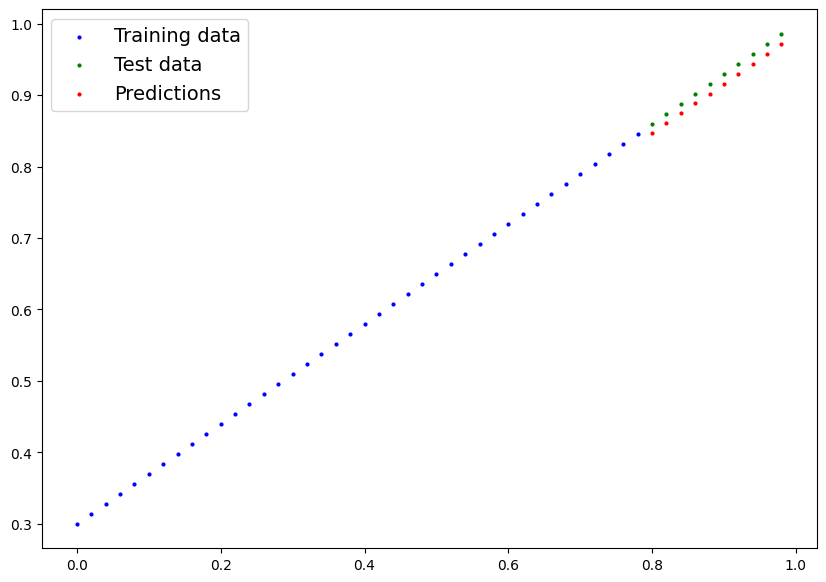

In [ ]:
# check out model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create save path
MODEL_NAME="01.Pytorch workflow model1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01.Pytorch workflow model1.pth


In [ ]:
# Load a Pytorch

#Create a new instance of linear regression model V2
loaded_model_1= LinearRegressionModelV2()

#Load the saved model1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the target model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')